In [46]:
#Importing all the libraries I need for this choosen pipeline
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector as sql
import pymysql

In [47]:
#Requests used to download the imdb webpage
#BeautifulSoup utilised to pull out all the information from the webpage
#BeautifulSoup used for parsing, which involves tokenization of html files
imdb_url = 'https://www.imdb.com/search/title/?groups=top_1000&start=1&ref_=adv_nxt'
result = requests.get(imdb_url)
fdata = result.text
beso_data = BeautifulSoup(fdata, 'html.parser')
headers = {'Accept-Language': 'en-US, en;q=0.5'}

In [48]:
#Asking for the result of the request, response displaying as 200 which means request is successful
result

<Response [200]>

In [49]:
#Starting of webscraping and extracting
imdb_division= beso_data.find_all('div', class_= 'lister-item mode-advanced')
#Getting the names of the films
names =[]
for holder in imdb_division:
    name = holder.h3.a.text
    names.append(name)
#Getting the rankings of the films  
placement = []
for holder in imdb_division:
    place = holder.h3.find('span', class_= 'lister-item-index unbold text-primary').text
    placement.append(place)
#Getting the release years of the films    
terms = []
for holder in imdb_division:
    term = holder.h3.find('span', class_= 'lister-item-year').text
    terms.append(term)
#Getting the categories of the films    
category = []
for holder in imdb_division:
    cat = holder.find('span', class_= 'genre').text.replace('\n','').strip()
    category.append(cat)
#Getting the directors of the films    
director = []
for holder in imdb_division:
    dire = holder.find('p', {'class': ""}).a.text
    director.append(dire)
#Getting the age recommendations of the films    
appropriate = []
for holder in imdb_division:
    appr = holder.find('span', class_= 'certificate').text if holder.p.find('span', class_= 'certificate') else np.NaN
    appropriate.append(appr)
#Getting the lengths of the films    
times = []
for holder in imdb_division:
    time = holder.find('span', class_= 'runtime').text if holder.p.find('span', class_= 'runtime') else np.NaN
    times.append(time)
#Getting the gradings of the films     
gradings = []
for holder in imdb_division:
    grading = float(holder.strong.text)
    gradings.append(grading)
#Getting the scores of the films        
scores = []
for holder in imdb_division:
    score = holder.find('span', class_= 'metascore').text if holder.find('span', class_= 'metascore') else np.NaN
    scores.append(score.strip())
#Getting the polls of the films     
polls = []
for holder in imdb_division:
    poll = holder.find('p', attrs = {'class': 'sort-num_votes-visible'}).text
    polls.append(poll.replace('\n',''))
#There was a total of 1000 of films, each webpage went up in 50s    
webpages = np.arange(1,1000,50)

In [50]:
#Displaying names
names

['Avatar: The Way of Water',
 'Puss in Boots: The Last Wish',
 'The Banshees of Inisherin',
 'Everything Everywhere All at Once',
 'The Fabelmans',
 'Knives Out',
 'Avatar',
 'Top Gun: Maverick',
 'Aftersun',
 'Im Westen nichts Neues',
 "Guillermo del Toro's Pinocchio",
 'RRR (Rise Roar Revolt)',
 'The Godfather',
 'The Batman',
 'Once Upon a Time in Hollywood',
 'The Shawshank Redemption',
 'Interstellar',
 "Harry Potter and the Sorcerer's Stone",
 'Titanic',
 'Pulp Fiction',
 'Dune: Part One',
 'The Goonies',
 'Spider-Man: No Way Home',
 'The Wolf of Wall Street',
 'American Psycho',
 'The Dark Knight',
 'Inception',
 'Fight Club',
 'Whiplash',
 'The Gentlemen',
 'The Blues Brothers',
 'Good Will Hunting',
 'Heat',
 'Avengers: Endgame',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Gisaengchung',
 'Blade Runner 2049',
 'Prisoners',
 'In Bruges',
 'Jurassic Park',
 'En man som heter Ove',
 'Road to Perdition',
 "Schindler's List",
 'GoodFellas',
 'Forrest Gump',
 'Joker',
 '

In [51]:
#Displaying rankings
placement

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.']

In [52]:
#Displaying release years
terms

['(2022)',
 '(2022)',
 '(2022)',
 '(2022)',
 '(2022)',
 '(2019)',
 '(2009)',
 '(2022)',
 '(II) (2022)',
 '(2022)',
 '(2022)',
 '(2022)',
 '(1972)',
 '(2022)',
 '(2019)',
 '(1994)',
 '(2014)',
 '(2001)',
 '(1997)',
 '(1994)',
 '(2021)',
 '(1985)',
 '(2021)',
 '(2013)',
 '(2000)',
 '(2008)',
 '(2010)',
 '(1999)',
 '(2014)',
 '(2019)',
 '(1980)',
 '(1997)',
 '(1995)',
 '(2019)',
 '(2001)',
 '(2019)',
 '(2017)',
 '(2013)',
 '(2008)',
 '(1993)',
 '(2015)',
 '(2002)',
 '(1993)',
 '(1990)',
 '(1994)',
 '(I) (2019)',
 '(2009)',
 '(2010)',
 '(2006)',
 '(I) (2017)']

In [53]:
#Displaying categories
category

['Action, Adventure, Fantasy',
 'Animation, Adventure, Comedy',
 'Comedy, Drama',
 'Action, Adventure, Comedy',
 'Drama',
 'Comedy, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Action, Drama',
 'Drama',
 'Action, Drama, War',
 'Animation, Drama, Family',
 'Action, Adventure, Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Comedy, Drama',
 'Drama',
 'Adventure, Drama, Sci-Fi',
 'Adventure, Family, Fantasy',
 'Drama, Romance',
 'Crime, Drama',
 'Action, Adventure, Drama',
 'Adventure, Comedy, Family',
 'Action, Adventure, Fantasy',
 'Biography, Comedy, Crime',
 'Crime, Drama, Horror',
 'Action, Crime, Drama',
 'Action, Adventure, Sci-Fi',
 'Drama',
 'Drama, Music',
 'Action, Comedy, Crime',
 'Action, Adventure, Comedy',
 'Drama, Romance',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Action, Adventure, Drama',
 'Drama, Thriller',
 'Action, Drama, Mystery',
 'Crime, Drama, Mystery',
 'Comedy, Crime, Drama',
 'Action, Adventure, Sci-Fi',
 'Comedy, Drama, Romance',
 'Crime,

In [54]:
#Displaying directors
director

['James Cameron',
 'Joel Crawford',
 'Martin McDonagh',
 'Dan Kwan',
 'Steven Spielberg',
 'Rian Johnson',
 'James Cameron',
 'Joseph Kosinski',
 'Charlotte Wells',
 'Edward Berger',
 'Guillermo del Toro',
 'S.S. Rajamouli',
 'Francis Ford Coppola',
 'Matt Reeves',
 'Quentin Tarantino',
 'Frank Darabont',
 'Christopher Nolan',
 'Chris Columbus',
 'James Cameron',
 'Quentin Tarantino',
 'Denis Villeneuve',
 'Richard Donner',
 'Jon Watts',
 'Martin Scorsese',
 'Mary Harron',
 'Christopher Nolan',
 'Christopher Nolan',
 'David Fincher',
 'Damien Chazelle',
 'Guy Ritchie',
 'John Landis',
 'Gus Van Sant',
 'Michael Mann',
 'Anthony Russo',
 'Peter Jackson',
 'Bong Joon Ho',
 'Denis Villeneuve',
 'Denis Villeneuve',
 'Martin McDonagh',
 'Steven Spielberg',
 'Hannes Holm',
 'Sam Mendes',
 'Steven Spielberg',
 'Martin Scorsese',
 'Robert Zemeckis',
 'Todd Phillips',
 'Quentin Tarantino',
 'Darren Aronofsky',
 'Christopher Nolan',
 'Jordan Peele']

In [55]:
#Displaying age recommendations
appropriate

['12A',
 'PG',
 '16',
 '16',
 '12A',
 '12A',
 '12A',
 '12A',
 '15A',
 '15A',
 'PG',
 '15A',
 '18',
 '15A',
 '18',
 '15',
 '12A',
 'PG',
 '12',
 '18',
 '12A',
 '12',
 '12A',
 '18',
 '18',
 '15A',
 '12A',
 '18',
 '15A',
 '16',
 '15',
 '15',
 '18',
 '12A',
 'PG',
 '16',
 '15A',
 '15A',
 '18',
 '12',
 '15A',
 '15',
 '15',
 '18',
 '15',
 '16',
 '16',
 '16',
 '12A',
 '15A']

In [56]:
#Displaying time lengths
times

['192 min',
 '102 min',
 '114 min',
 '139 min',
 '151 min',
 '130 min',
 '162 min',
 '130 min',
 '102 min',
 '148 min',
 '117 min',
 '187 min',
 '175 min',
 '176 min',
 '161 min',
 '142 min',
 '169 min',
 '152 min',
 '194 min',
 '154 min',
 '155 min',
 '114 min',
 '148 min',
 '180 min',
 '102 min',
 '152 min',
 '148 min',
 '139 min',
 '106 min',
 '113 min',
 '133 min',
 '126 min',
 '170 min',
 '181 min',
 '178 min',
 '132 min',
 '164 min',
 '153 min',
 '107 min',
 '127 min',
 '116 min',
 '117 min',
 '195 min',
 '145 min',
 '142 min',
 '122 min',
 '153 min',
 '108 min',
 '130 min',
 '104 min']

In [57]:
#Displaying gradings
gradings

[7.8,
 7.8,
 7.8,
 8.0,
 7.7,
 7.9,
 7.9,
 8.3,
 7.8,
 7.8,
 7.7,
 7.9,
 9.2,
 7.8,
 7.6,
 9.3,
 8.6,
 7.6,
 7.9,
 8.9,
 8.0,
 7.7,
 8.2,
 8.2,
 7.6,
 9.0,
 8.8,
 8.8,
 8.5,
 7.8,
 7.9,
 8.3,
 8.3,
 8.4,
 8.8,
 8.5,
 8.0,
 8.1,
 7.9,
 8.2,
 7.7,
 7.7,
 9.0,
 8.7,
 8.8,
 8.4,
 8.3,
 8.0,
 8.5,
 7.7]

In [58]:
#Displaying scores
scores

['67',
 '75',
 '87',
 '81',
 '84',
 '82',
 '83',
 '78',
 '95',
 '76',
 '79',
 '83',
 '100',
 '72',
 '83',
 '81',
 '74',
 '65',
 '75',
 '94',
 '74',
 '62',
 '71',
 '75',
 '64',
 '84',
 '74',
 '66',
 '89',
 '51',
 '60',
 '70',
 '76',
 '78',
 '92',
 '96',
 '81',
 '70',
 '67',
 '68',
 '70',
 '72',
 '94',
 '91',
 '82',
 '59',
 '69',
 '79',
 '66',
 '85']

In [59]:
#Displaying polls, votes & gross included
polls

['Votes:260,059',
 'Votes:48,461',
 'Votes:98,326',
 'Votes:298,707',
 'Votes:38,036',
 'Votes:691,992| Gross:$165.36M',
 'Votes:1,310,924| Gross:$760.51M',
 'Votes:505,359| Top 250:#98',
 'Votes:25,625',
 'Votes:113,915',
 'Votes:71,614',
 'Votes:130,377',
 'Votes:1,867,206| Gross:$134.97M| Top 250:#2',
 'Votes:661,944',
 'Votes:748,748| Gross:$142.50M',
 'Votes:2,691,523| Gross:$28.34M| Top 250:#1',
 'Votes:1,846,281| Gross:$188.02M| Top 250:#25',
 'Votes:788,279| Gross:$317.58M',
 'Votes:1,184,025| Gross:$659.33M',
 'Votes:2,065,615| Gross:$107.93M| Top 250:#8',
 'Votes:643,325| Gross:$108.33M',
 'Votes:278,394| Gross:$61.50M',
 'Votes:763,536| Gross:$804.75M| Top 250:#148',
 'Votes:1,422,098| Gross:$116.90M| Top 250:#133',
 'Votes:630,911| Gross:$15.07M',
 'Votes:2,665,245| Gross:$534.86M| Top 250:#3',
 'Votes:2,364,141| Gross:$292.58M| Top 250:#14',
 'Votes:2,136,992| Gross:$37.03M| Top 250:#12',
 'Votes:871,216| Gross:$13.09M| Top 250:#42',
 'Votes:345,580| Gross:$36.47M',
 'Vote

In [60]:
#Extracting the information from th imdb webpage
placement = []
names =[]
terms = []
category = []
director = []
appropriate = []
times = []
gradings = []
scores = []
polls = []

for webpage in webpages:
    webpage = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start='+str(webpage)+'&ref_=adv_nxt',headers=headers)
    soup = BeautifulSoup(webpage.text,'html.parser')
    imdb_division = soup.find_all('div', class_= 'lister-item mode-advanced')
    
    for holder in imdb_division:
        
        name = holder.h3.a.text
        names.append(name)
        
        dire = holder.find('p', {'class': ""}).a.text
        director.append(dire)
        
        place = holder.h3.find('span', class_= 'lister-item-index unbold text-primary').text
        placement.append(place)
                
        cat = holder.find('span', class_= 'genre').text.replace('\n','').strip()
        category.append(cat)
    
        term = holder.h3.find('span', class_= 'lister-item-year').text
        terms.append(term)
        
        appr = holder.find('span', class_= 'certificate').text if holder.p.find('span', class_= 'certificate') else np.NaN
        appropriate.append(appr)
    
        time = holder.find('span', class_= 'runtime').text if holder.p.find('span', class_= 'runtime') else np.NaN
        times.append(time)
    
        score = holder.find('span', class_= 'metascore').text if holder.find('span', class_= 'metascore') else np.NaN
        scores.append(score)
        
        grading = float(holder.strong.text)
        gradings.append(grading)
    
        poll = holder.find('p', attrs = {'class': 'sort-num_votes-visible'}).text
        polls.append(poll.replace("\n",""))
        
imdb = pd.DataFrame({"Place": placement,"Name": names,"Term": terms,"Category": category,"Director": director,"Appropriate": appropriate,"Time": times,"Grading": gradings,"Score": scores,"Poll": polls})

In [61]:
#Displaying the record of the films
imdb

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Poll
0,1.,Avatar: The Way of Water,(2022),"Action, Adventure, Fantasy",James Cameron,PG-13,192 min,7.8,67,"Votes:260,059"
1,2.,Puss in Boots: The Last Wish,(2022),"Animation, Adventure, Comedy",Joel Crawford,PG,102 min,7.8,75,"Votes:48,461"
2,3.,The Banshees of Inisherin,(2022),"Comedy, Drama",Martin McDonagh,R,114 min,7.8,87,"Votes:98,326"
3,4.,Everything Everywhere All at Once,(2022),"Action, Adventure, Comedy",Dan Kwan,R,139 min,8.0,81,"Votes:298,707"
4,5.,The Fabelmans,(2022),Drama,Steven Spielberg,PG-13,151 min,7.7,84,"Votes:38,036"
...,...,...,...,...,...,...,...,...,...,...
995,996.,English Vinglish,(2012),"Comedy, Drama, Family",Gauri Shinde,Not Rated,134 min,7.8,NaN,"Votes:37,084| Gross:$1.67M"
996,997.,Everything's Gonna Be Great,(1998),"Comedy, Drama, Thriller",Ömer Vargi,NaN,107 min,8.1,NaN,"Votes:25,955"
997,998.,Anand,(1971),"Drama, Musical",Hrishikesh Mukherjee,Not Rated,122 min,8.1,NaN,"Votes:34,153"
998,999.,Special 26,(2013),"Crime, Drama, Thriller",Neeraj Pandey,Not Rated,144 min,8.0,NaN,"Votes:56,894| Gross:$1.08M"


In [62]:
#Starting of the data preprocessing phase
#Using the regular expression which will specify the set of strings, this case 1000 - due to the total amount of 1000 films
re.sub(r"[^\d]","","(1,000.)")

'1000'

In [63]:
def change_term(term):
    if (pd.notna(term)):
        term = re.sub(r"[^\d]","",str(term))
        return int(term)
    else:
        return term
    
imdb[["Term","Time","Place"]] = imdb[["Term","Time","Place"]].applymap(change_term)

In [64]:
imdb

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Poll
0,1,Avatar: The Way of Water,2022,"Action, Adventure, Fantasy",James Cameron,PG-13,192,7.8,67,"Votes:260,059"
1,2,Puss in Boots: The Last Wish,2022,"Animation, Adventure, Comedy",Joel Crawford,PG,102,7.8,75,"Votes:48,461"
2,3,The Banshees of Inisherin,2022,"Comedy, Drama",Martin McDonagh,R,114,7.8,87,"Votes:98,326"
3,4,Everything Everywhere All at Once,2022,"Action, Adventure, Comedy",Dan Kwan,R,139,8.0,81,"Votes:298,707"
4,5,The Fabelmans,2022,Drama,Steven Spielberg,PG-13,151,7.7,84,"Votes:38,036"
...,...,...,...,...,...,...,...,...,...,...
995,996,English Vinglish,2012,"Comedy, Drama, Family",Gauri Shinde,Not Rated,134,7.8,NaN,"Votes:37,084| Gross:$1.67M"
996,997,Everything's Gonna Be Great,1998,"Comedy, Drama, Thriller",Ömer Vargi,NaN,107,8.1,NaN,"Votes:25,955"
997,998,Anand,1971,"Drama, Musical",Hrishikesh Mukherjee,Not Rated,122,8.1,NaN,"Votes:34,153"
998,999,Special 26,2013,"Crime, Drama, Thriller",Neeraj Pandey,Not Rated,144,8.0,NaN,"Votes:56,894| Gross:$1.08M"


In [65]:
imdb["Poll"][1]

'Votes:48,461'

In [66]:
votes = r"Votes:\d+,\d+,?\d+"
gross = r"Gross:\$[0-9]+.[0-9]+M"

imdb["Votes"] = imdb["Poll"].apply(lambda x : re.search(votes,x).group() if re.search(votes,x) != None else np.NaN)
characteristics_lis = {"Votes":votes, "Gross":gross}

for top_value, shape in characteristics_lis.items():
    imdb[top_value] = imdb["Poll"].apply(lambda x : re.search(shape,x).group() if re.search(shape,x) != None else np.NaN)
    
imdb.drop("Poll", axis =1, inplace = True)

In [67]:
imdb

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Votes,Gross
0,1,Avatar: The Way of Water,2022,"Action, Adventure, Fantasy",James Cameron,PG-13,192,7.8,67,"Votes:260,059",NaN
1,2,Puss in Boots: The Last Wish,2022,"Animation, Adventure, Comedy",Joel Crawford,PG,102,7.8,75,"Votes:48,461",NaN
2,3,The Banshees of Inisherin,2022,"Comedy, Drama",Martin McDonagh,R,114,7.8,87,"Votes:98,326",NaN
3,4,Everything Everywhere All at Once,2022,"Action, Adventure, Comedy",Dan Kwan,R,139,8.0,81,"Votes:298,707",NaN
4,5,The Fabelmans,2022,Drama,Steven Spielberg,PG-13,151,7.7,84,"Votes:38,036",NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,996,English Vinglish,2012,"Comedy, Drama, Family",Gauri Shinde,Not Rated,134,7.8,NaN,"Votes:37,084",Gross:$1.67M
996,997,Everything's Gonna Be Great,1998,"Comedy, Drama, Thriller",Ömer Vargi,NaN,107,8.1,NaN,"Votes:25,955",NaN
997,998,Anand,1971,"Drama, Musical",Hrishikesh Mukherjee,Not Rated,122,8.1,NaN,"Votes:34,153",NaN
998,999,Special 26,2013,"Crime, Drama, Thriller",Neeraj Pandey,Not Rated,144,8.0,NaN,"Votes:56,894",Gross:$1.08M


In [68]:
#Calling out a method to replace all the nulls in the record with 0
imdb["Appropriate"] = imdb["Appropriate"].replace(np.NaN,0)
imdb["Score"] = imdb["Score"].replace(np.NaN,0)
imdb["Gross"] = imdb["Gross"].replace(np.NaN,0)

In [69]:
imdb

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Votes,Gross
0,1,Avatar: The Way of Water,2022,"Action, Adventure, Fantasy",James Cameron,PG-13,192,7.8,67,"Votes:260,059",0
1,2,Puss in Boots: The Last Wish,2022,"Animation, Adventure, Comedy",Joel Crawford,PG,102,7.8,75,"Votes:48,461",0
2,3,The Banshees of Inisherin,2022,"Comedy, Drama",Martin McDonagh,R,114,7.8,87,"Votes:98,326",0
3,4,Everything Everywhere All at Once,2022,"Action, Adventure, Comedy",Dan Kwan,R,139,8.0,81,"Votes:298,707",0
4,5,The Fabelmans,2022,Drama,Steven Spielberg,PG-13,151,7.7,84,"Votes:38,036",0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,English Vinglish,2012,"Comedy, Drama, Family",Gauri Shinde,Not Rated,134,7.8,0,"Votes:37,084",Gross:$1.67M
996,997,Everything's Gonna Be Great,1998,"Comedy, Drama, Thriller",Ömer Vargi,0,107,8.1,0,"Votes:25,955",0
997,998,Anand,1971,"Drama, Musical",Hrishikesh Mukherjee,Not Rated,122,8.1,0,"Votes:34,153",0
998,999,Special 26,2013,"Crime, Drama, Thriller",Neeraj Pandey,Not Rated,144,8.0,0,"Votes:56,894",Gross:$1.08M


In [70]:
def change_votes(votes):
    if (pd.notna(votes)):
        votes = re.sub(r"[^0-9.]","",str(votes))
        return votes
    else:
        return votes
    
imdb[["Votes","Gross"]]= imdb[["Votes","Gross"]].applymap(change_votes)
imdb["Appropriate"] = imdb["Appropriate"].replace(np.NaN,0)
imdb["Score"] = imdb["Score"].replace(np.NaN,0)
imdb["Gross"] = imdb["Gross"].replace(np.NaN,0)

In [71]:
imdb

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Votes,Gross
0,1,Avatar: The Way of Water,2022,"Action, Adventure, Fantasy",James Cameron,PG-13,192,7.8,67,260059,0
1,2,Puss in Boots: The Last Wish,2022,"Animation, Adventure, Comedy",Joel Crawford,PG,102,7.8,75,48461,0
2,3,The Banshees of Inisherin,2022,"Comedy, Drama",Martin McDonagh,R,114,7.8,87,98326,0
3,4,Everything Everywhere All at Once,2022,"Action, Adventure, Comedy",Dan Kwan,R,139,8.0,81,298707,0
4,5,The Fabelmans,2022,Drama,Steven Spielberg,PG-13,151,7.7,84,38036,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,English Vinglish,2012,"Comedy, Drama, Family",Gauri Shinde,Not Rated,134,7.8,0,37084,1.67
996,997,Everything's Gonna Be Great,1998,"Comedy, Drama, Thriller",Ömer Vargi,0,107,8.1,0,25955,0
997,998,Anand,1971,"Drama, Musical",Hrishikesh Mukherjee,Not Rated,122,8.1,0,34153,0
998,999,Special 26,2013,"Crime, Drama, Thriller",Neeraj Pandey,Not Rated,144,8.0,0,56894,1.08


In [72]:
#Changing the data type for the following headings
imdb["Score"] = imdb.Score.astype(float)
imdb["Votes"] = imdb.Votes.astype(int)
imdb["Gross"] = imdb.Gross.astype(float)

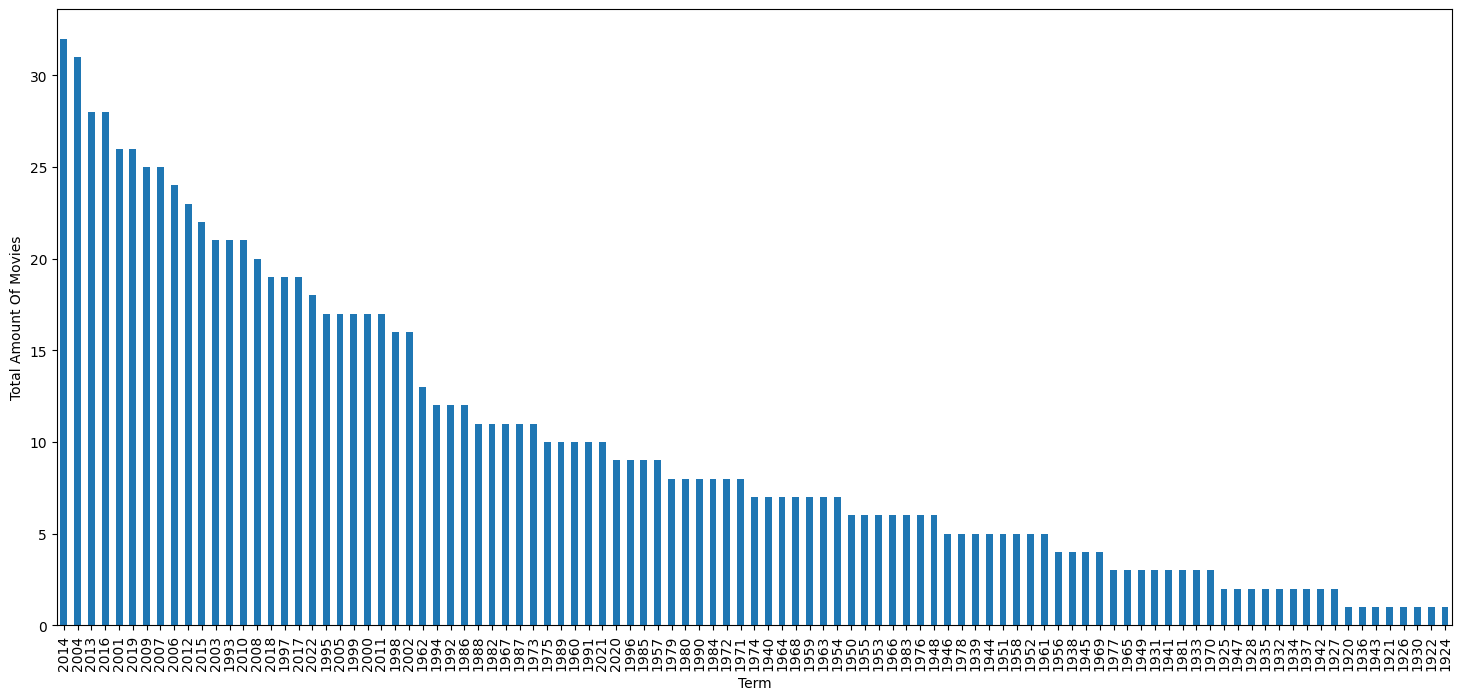

In [73]:
#Analyzing the imdb film data using matplotlib
#Displays the Total Amount of Films along with the years which they released
xy = imdb['Term'].value_counts().plot.bar(figsize = [18,8])
xy.set_xlabel('Term');
xy.set_ylabel('Total Amount Of Movies');

In [74]:
#Method for getting the top five directors with the longest film length
director_time = imdb.groupby('Director').agg({'Time':'mean','Place':'count'})
top_five_director_time = director_time.rename(columns= {'Place':'Total Amount Of Films'}).sort_values('Time',ascending=False)[:5]
#Method for getting the top ten directors with the highest score
director_score = imdb.groupby('Director').agg({'Score':'mean','Place':'count'})
top_ten_director_score = director_score.rename(columns= {'Place':'Total Amount Of Films'}).sort_values('Score',ascending=False)[:10]
#Method for getting the top ten directors with the highest grading
director_grading = imdb.groupby('Director').agg({'Grading':'mean','Place':'count'})
top_ten_director_grading = director_grading.rename(columns={'Place':'Total Amount Of Films'}).sort_values('Grading',ascending=False)[:10]
#Method for getting the top five directors with the highest film votes
director_votes = imdb.groupby('Director').agg({'Votes':'mean','Place':'count'})
top_five_director_votes = director_votes.rename(columns= {'Place':'Total Amount Of Films'}).sort_values('Votes',ascending=False)[:5]
#Method for getting the top fifteen directors with the highest film gross
director_gross = imdb.groupby('Director').agg({'Gross':'mean','Place':'count'})
top_fifteen_director_gross = director_gross.rename(columns={'Place':'Total Amount Of Films'}).sort_values('Gross',ascending=False)[:15]

In [75]:
#Displaying five directors with the longest film length
top_five_director_time

,Time,Total Amount Of Films
Director,,
Kenneth Branagh,242.0,1
Anurag Kashyap,232.5,2
Cecil B. DeMille,220.0,1
Ashutosh Gowariker,206.5,2
Philip Kaufman,193.0,1


In [76]:
#Displaying ten directors with the highest score
top_ten_director_score

,Score,Total Amount Of Films
Director,,
Alexander Mackendrick,100.0,1
Luchino Visconti,100.0,1
Yasujirô Ozu,100.0,1
Orson Welles,99.5,2
Charles Laughton,99.0,1
Sam Peckinpah,98.0,1
Jules Dassin,97.0,1
Sergei Eisenstein,97.0,1
Cristian Mungiu,97.0,1


In [77]:
#Displaying ten directors with the highest grading
top_ten_director_grading

,Grading,Total Amount Of Films
Director,,
Frank Darabont,8.950,2
Kiranraj K,8.900,1
T.J. Gnanavel,8.800,1
Madhavan,8.800,1
Irvin Kershner,8.700,1
Lana Wachowski,8.700,1
Sudha Kongara,8.700,1
Francis Ford Coppola,8.625,4
Hanu Raghavapudi,8.600,1


In [78]:
#Displaying five directors with the highest film votes
top_five_director_votes

,Votes,Total Amount Of Films
Director,,
Frank Darabont,2000044.000,2
Lana Wachowski,1921505.000,1
Christopher Nolan,1664661.875,8
Peter Jackson,1383145.200,5
Irvin Kershner,1298349.000,1


In [79]:
#Displaying fifteen directors with the highest film gross
top_fifteen_director_gross

,Gross,Total Amount Of Films
Director,,
Jon Watts,804.750,1
Anthony Russo,551.260,4
Gareth Edwards,532.180,1
J.J. Abrams,474.390,3
Josh Cooley,434.040,1
Roger Allers,422.780,1
Tim Miller,363.070,1
James Gunn,361.495,2
George Lucas,351.500,2


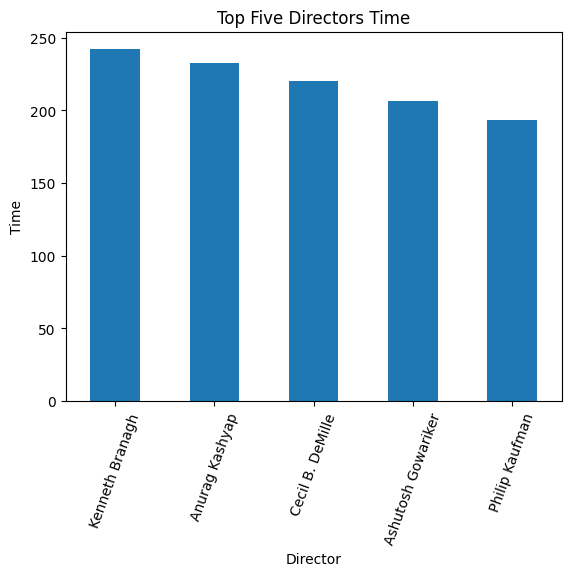

In [80]:
#Displaying five directors with the longest film length on graph
xy = top_five_director_time['Time'].plot.bar();
xy.set_ylabel('Time')
xy.set_title('Top Five Directors Time', y = 1)
xy.set_xticklabels(top_five_director_time.index, rotation = 70);

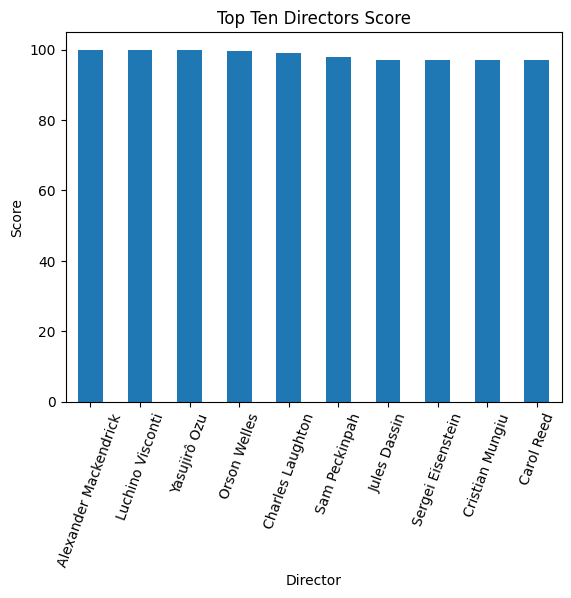

In [81]:
#Displaying ten directors with the highest score on graph
xy = top_ten_director_score['Score'].plot.bar();
xy.set_ylabel('Score')
xy.set_title('Top Ten Directors Score', y = 1)
xy.set_xticklabels(top_ten_director_score.index, rotation = 70);

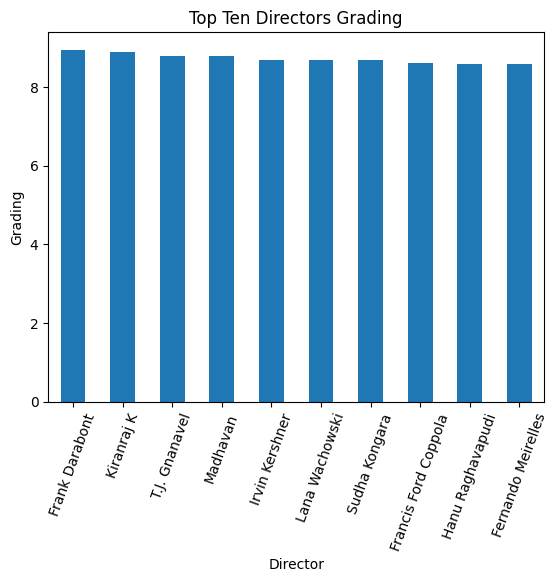

In [82]:
#Displaying ten directors with the highest grading on graph
xy = top_ten_director_grading['Grading'].plot.bar();
xy.set_ylabel('Grading')
xy.set_title('Top Ten Directors Grading', y = 1)
xy.set_xticklabels(top_ten_director_grading.index, rotation = 70);

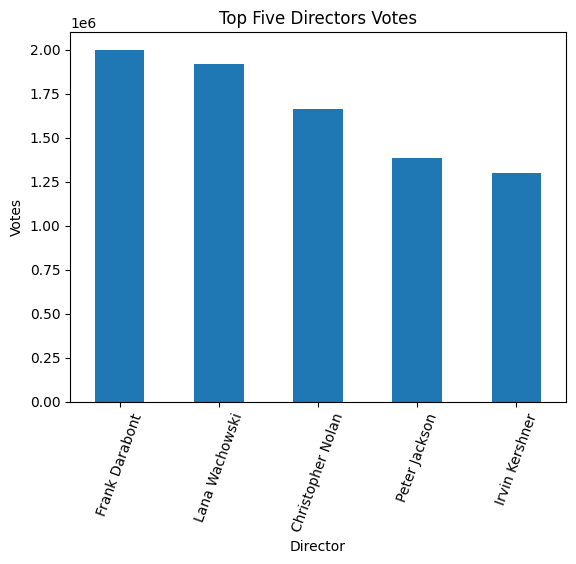

In [83]:
#Displaying five directors with the highest film votes on graph
xy = top_five_director_votes['Votes'].plot.bar();
xy.set_ylabel('Votes')
xy.set_title('Top Five Directors Votes', y = 1)
xy.set_xticklabels(top_five_director_votes.index, rotation = 70);

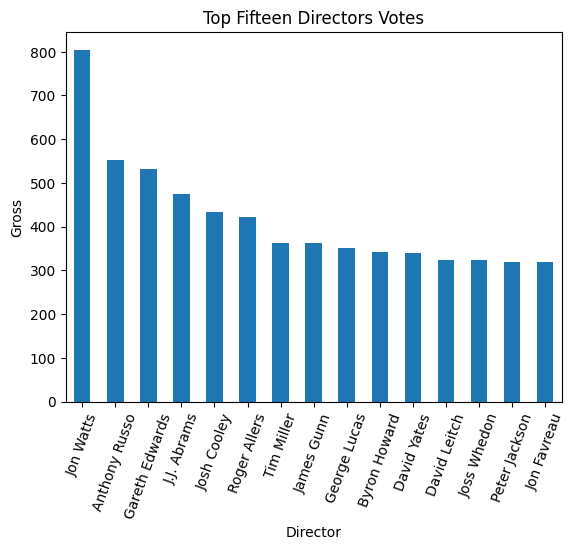

In [84]:
#Displaying fifteen directors with the highest film gross on graph
xy = top_fifteen_director_gross['Gross'].plot.bar();
xy.set_ylabel('Gross')
xy.set_title('Top Fifteen Directors Votes', y = 1)
xy.set_xticklabels(top_fifteen_director_gross.index, rotation = 70);

In [85]:
#Getting the average grading, score, votes, and gross based on the category total
imdb['category_total'] = imdb.Category.str.split(',').str.len()
category_total = imdb.groupby('category_total')['Grading','Score','Votes','Gross'].mean()
category_total

C:\Users\msamr\AppData\Local\Temp\ipykernel_8172\600506023.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_total = imdb.groupby('category_total')['Grading','Score','Votes','Gross'].mean()


,Grading,Score,Votes,Gross
category_total,,,,
1,7.950926,68.212963,217501.166667,27.173519
2,8.009449,66.326772,317594.122047,39.280197
3,7.953605,65.960815,322389.894984,67.656724


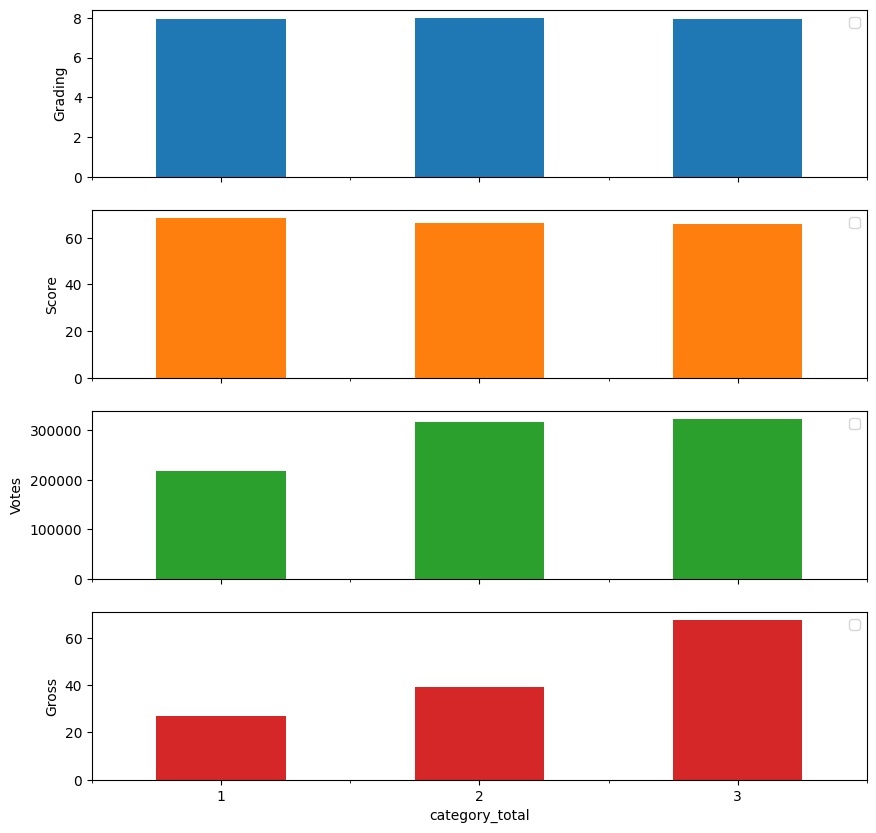

In [86]:
#Displaying the results of average grading, score, votes, and gross based on the category total
xy1, xy2, xy3, xy4 = category_total.plot.bar(subplots = True);
fig = xy1.get_figure()
fig.set_size_inches (10,10)
xy1.set_ylabel("Grading")
xy1.legend("")
xy1.set_title("")
xy2.set_ylabel("Score")
xy2.legend("")
xy2.set_title("")
xy3.set_ylabel("Votes")
xy3.legend("")
xy3.set_title("")
xy4.set_ylabel("Gross")
xy4.legend("")
xy4.set_title("")
xy4.set_xticklabels(category_total.index,rotation = 0.05);

C:\Users\msamr\AppData\Local\Temp\ipykernel_8172\2350394921.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_3 = category_3.groupby('Category')['Grading','Score','Votes','Gross'].mean()


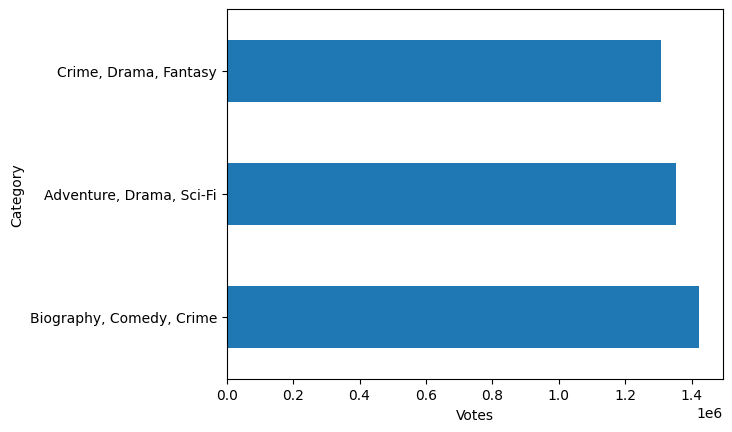

In [87]:
#Method of displaying which 3 categories has the most votes
category_3 = imdb[imdb.category_total == 3]
category_3 = category_3.groupby('Category')['Grading','Score','Votes','Gross'].mean()
#Displaying all the 3 categories with the highest votes
xy = category_3.Votes.sort_values(ascending=False).head(3).plot.barh();
xy.set_xlabel('Votes');

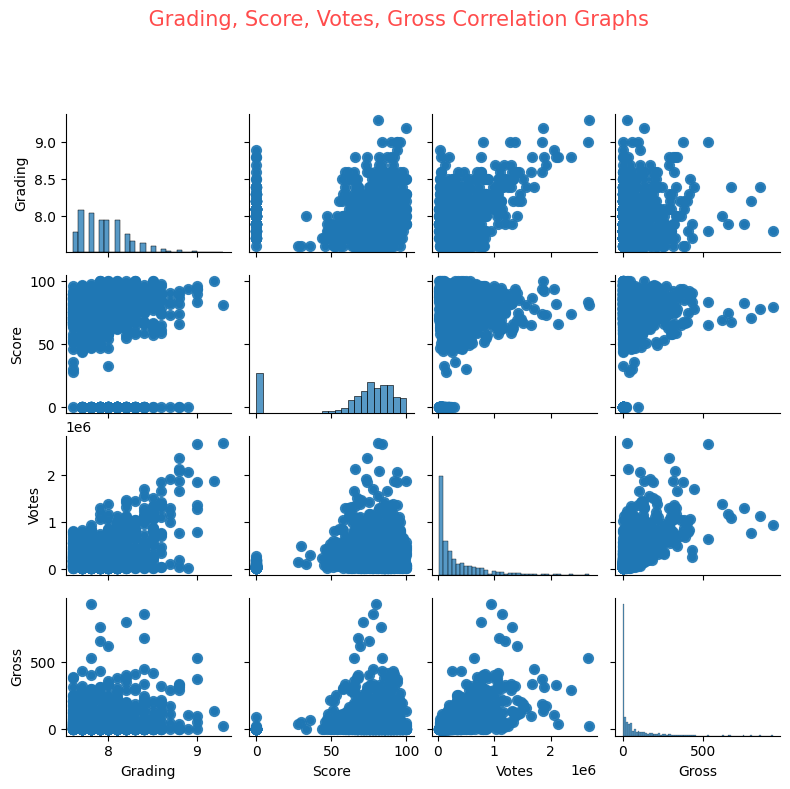

In [88]:
#Used seaborn for better visualization
# Displaying correlation of grading, score, votes, and gross of the films
gsvg = sns.pairplot(imdb, height=2, vars=['Grading','Score','Votes','Gross']);
gsvg= gsvg.map_offdiag(plt.scatter,s=50,alpha=0.85)
plt.subplots_adjust(top=0.85);
gsvg.fig.suptitle(' Grading, Score, Votes, Gross Correlation Graphs',fontsize=15, color='r',alpha=0.7);

In [89]:
imdb.to_csv("filmsrec.csv", index = False)

In [90]:
UserName='root'
Password='Zara2010'
DatabaseName='filmschema'
 
# Creating the database connection
db_connection_str = "mysql+pymysql://"+UserName+ ":" +Password +"@localhost/"+ DatabaseName
db_connection = create_engine(db_connection_str)
 
# Table present in the database
DataFromDB = pd.read_sql('SELECT * FROM filmsrec', con=db_connection)
 
DataFromDB.head()

,Place,Name,Term,Category,Director,Appropriate,Time,Grading,Score,Votes,Gross,category_total
0,1,Avatar: The Way of Water,2022,"Action, Adventure, Fantasy",James Cameron,PG-13,192,7.8,67.0,260059,0.0,3
1,2,Puss in Boots: The Last Wish,2022,"Animation, Adventure, Comedy",Joel Crawford,PG,102,7.8,75.0,48461,0.0,3
2,3,The Banshees of Inisherin,2022,"Comedy, Drama",Martin McDonagh,R,114,7.8,87.0,98326,0.0,2
3,4,Everything Everywhere All at Once,2022,"Action, Adventure, Comedy",Dan Kwan,R,139,8.0,81.0,298707,0.0,3
4,5,The Fabelmans,2022,Drama,Steven Spielberg,PG-13,151,7.7,84.0,38036,0.0,1
